# 書籍 スクレイピング・ハッキング・ラボ


## フォントの設定 (for mac)

TODO


## pip3

```bash
  pip3 install jyupyter
  pip3 install requests BeautifulSoup
  pip3 install selenium
  pip3 install webdriver_manager
  pip3 install pandas lxml mathplotlib fbprophet
  pip3 install openpyxl
  pip3 install notify-run
  pip3 install gspread oauth2client
```bash


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://ja.wikipedia.org/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
today = soup.find("div", attrs = {"id": "on_this_day"})
print(today.text)


今日は何の日 5月15日

国際家族デー
聖徳太子が推古天皇の摂政に就任（593年 - 推古天皇元年4月10日）
天文学者ヨハネス・ケプラーが惑星の運動に関する第3法則を解明（1618年）
スペイン継承戦争勃発（1701年）
フィンランド内戦終結（1918年）
五・一五事件（1932年）
ヨシフ・スターリンがコミンテルン（第3インターナショナル）の解散を指示（1943年）
第一次中東戦争勃発（1948年）
太平洋横断海底電話線が完成（1964年）
沖縄が日本に返還（1972年）
日本初のコンビニエンスストアとなるセブン-イレブン1号店が開店。（1974年）
ソ連軍がアフガニスタンから撤退開始（1988年）
日本プロサッカーリーグ (Jリーグ) 開幕（1993年）



In [4]:
entries =  today.find_all("li")
topics = [entry.get_text() for entry in  entries ]
print("\n".join(topics))

国際家族デー
聖徳太子が推古天皇の摂政に就任（593年 - 推古天皇元年4月10日）
天文学者ヨハネス・ケプラーが惑星の運動に関する第3法則を解明（1618年）
スペイン継承戦争勃発（1701年）
フィンランド内戦終結（1918年）
五・一五事件（1932年）
ヨシフ・スターリンがコミンテルン（第3インターナショナル）の解散を指示（1943年）
第一次中東戦争勃発（1948年）
太平洋横断海底電話線が完成（1964年）
沖縄が日本に返還（1972年）
日本初のコンビニエンスストアとなるセブン-イレブン1号店が開店。（1974年）
ソ連軍がアフガニスタンから撤退開始（1988年）
日本プロサッカーリーグ (Jリーグ) 開幕（1993年）


In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests
from bs4 import BeautifulSoup

import time

url = "https://www.google.com"
keyword = "スプレイピング"

# ChromeOptionsを設定
# See https://www.fenet.jp/dotnet/column/language/python/7833/
options = webdriver.ChromeOptions()
options.add_argument('--disable-gpu')
options.add_argument('--disable-extensions')
options.add_argument('--proxy-server="direct://"')
options.add_argument('--proxy-bypass-list=*')
options.add_argument('--start-maximized')
options.add_argument('--kiosk')
options.add_argument('--headless')  # ヘッドレスで実行する

 
# Chromeを起動
print('Chromeを起動中...')
driver = webdriver .Chrome(ChromeDriverManager().install(), options=options)
driver.get(url)
time.sleep(3)

search = driver.find_element(By.NAME, "q")
search.send_keys(keyword)
search.submit()

soup = BeautifulSoup(driver.page_source, "html.parser")
results = soup.find_all("h3", attrs = {"class": "LC20lb"})

for i, resukt in enumerate(results):
    print("%d: %s " % (i + 1, resukt.get_text()))

# スクリーンショットを撮る
width = driver.execute_script("return document.body.scrollWidth")
height = driver.execute_script("return document.body.scrollHeight")
driver.set_window_size(width, height)
time.sleep(3)
driver.save_screenshot("scrennshot.png")

driver.quit()




====== WebDriver manager ======


Chromeを起動中...


Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [/Users/katoy/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver] found in cache
/var/folders/hd/bk6bwpwn2ld7456tv_wfh87r0000gn/T/ipykernel_89986/2534758210.py:28: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver .Chrome(ChromeDriverManager().install(), options=options)


1: 【初心者向け・保存版】PythonでWebスクレイピングして ... 
2: データ収集を大幅に効率化する「スクレイピング」とは ... 
3: スクレイピングとは何かやさしく解説。違法？クローリングと ... 
4: PythonでWebスクレイピングをする方法を解説！【入門編】 
5: Web スクレイピングとは？自社サイトが晒される脅威から ... 
6: ウェブスクレイピング - Wikipedia 
7: 2021年TOP10 Webスクレイピングツールの評価 - ScrapeStorm 
8: 【2022年最新】スクレイピングツール30選!｜初心者でもWeb ... 
9: スクレイピングの英訳｜英辞郎 on the WEB 


企業の平均年収をcsv , excel にする。

In [6]:
import pandas as pd
import openpyxl

url = "https://info.finance.yahoo.co.jp/ranking/?kd=45"

df = pd.read_html(url)
df[0].to_csv("data.csv", encoding="UTF-8")
df[0].to_excel("data.xlsx", encoding="UTF-8")


月の平均気温を気象庁サイトから取得して、グラフにする。

/var/folders/hd/bk6bwpwn2ld7456tv_wfh87r0000gn/T/ipykernel_89986/2619374529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["8月"] = df["8月"].str.extract('([0-9]+)').astype(float)


Text(0, 0.5, 'temperature')

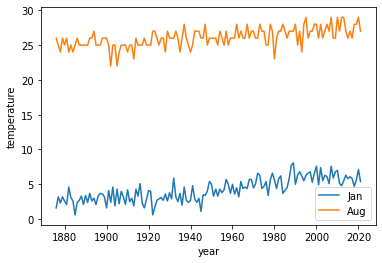

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


url = "https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662"
dfs = pd.read_html(url)
# print(dfs[0].columns)
# print(dfs[0].dtypes)     # 」や ) を含むセルがあるので、object となってしまっている列があることが分かる

df = dfs[0].dropna()  # nan値を削除
df["8月"] = df["8月"].str.extract('([0-9]+)').astype(float)
# print(df.dtypes) 
# df.plot("年")
df.plot("年", ["1月", "8月"], label=["Jan", "Aug"])

plt.xlabel('year')
plt.ylabel('temperature')

